In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
from astropy.table import Table

In [2]:
fits1 = '/Users/samquist/Documents/AstroData/kepler_dr2_1arcsec.fits'

In [6]:
data = Table.read(fits1, format='fits')
color = data.to_pandas()

txt1 = '/Users/samquist/Documents/AstroData/Table_Periodic.txt'
prot = pd.read_csv(txt1)
md = pd.merge(prot, color, right_on='kepid', left_on='KID')
#I don't understand what all the [ok] criteria you used were


ok = np.where(np.isfinite(md[u'parallax']) & # this is basically the same as the TGAS file...
              (md[u'parallax_error'] < 0.1) &
              (md[u'r_modality_flag'] == 1) & 
              (md[u'r_result_flag'] == 1) &
              np.isfinite(md[u'bp_rp']) & 
              (md[u'phot_bp_mean_flux_error']/md[u'phot_bp_mean_flux'] < 0.01) & 
              (md[u'phot_rp_mean_flux_error']/md[u'phot_rp_mean_flux'] < 0.01) & 
              (md[u'phot_g_mean_flux_error']/md[u'phot_g_mean_flux'] < 0.01))[0]

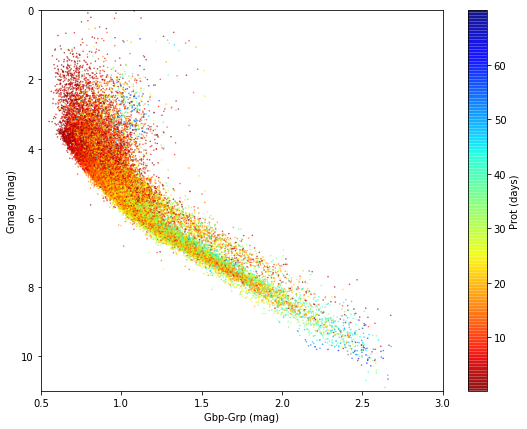

In [11]:
cm = plt.cm.jet_r

fig, ax1 = plt.subplots(figsize = (9,7))


plt.scatter(md['bp_rp'].values[ok], 
            md['phot_g_mean_mag'].values[ok] - 5. * np.log10(md['r_est']).values[ok] + 5, 
            c=(md['Prot'].values[ok]), alpha = .7, s=.3, cmap=cm)

plt.xlim(.5,3)
plt.xlabel('Gbp-Grp (mag)')
plt.ylim(11,0)
plt.ylabel('Gmag (mag)')
cb = plt.colorbar()
cb.set_label('Prot (days)')
